## Final Assignment Python Programming
Cornélius CELLIER 59418<br>
Clément DELAHAYE 63500<br>
Nicolas RONGEARD 64001<br>
## 1. Make a descriptive analysis of the variables in the dataset.
### A. Preliminaries
>In the code cell below, we import the Python modules we need:
>* **Numpy and Pandas** for data manipulation & transformation
>* **Seaborn and Matplotlib** for data visualisation
>* **Statsmodels** for statistics & regression

In [62]:
#import & set up pandas
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#import numpy
import numpy as np

#import & set up seaborn & matplotlib
import seaborn as sns
sns.set_context('notebook')
import matplotlib.pyplot as plt
%matplotlib inline

#import statsmodels
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix

>Then we import our dataset as a Pandas dataframe and we create a copy of this untouched dataset named df2.

In [63]:
path = "card_debt.csv"
df = pd.read_csv(path)
df2 = df.copy()

### B. First data inspection
>The info() function gives us crucial information about our database:
    >* the card_debt dataset contains data on 400 people.
    >* It does not contain any nan values.
    > * Variables have multiple types: 
       >>1 column contains floats<br>
       >>6 columns contain integers<br>
       >>5 columns contain strings

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  AvgDebt    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


>The head() function returns the first 5 rows of our dataset, which allows us to become familiar with it :
>* There is both socio-demographic and banking variables in the dataset : the data is probably entered by employees or customers or is calculated from the customers' bank data
    
>* We can distinguish categorical variables : Age, Gender, Student, Married & even Ethnicity...
>* ... and numerical variables : Income, Debt Limit, Customer Rating, Number of Cards, Age, Education and - the dependent variable of our model - AvgDebt.<br/>
 
>* Some columns store information in a different format : we'll need to transform these categorical variables into dummies.<br/>These criteria will only take 2 value, 0 & 1. 

>* The coeficients of categorical variables are "categorical"-effect, where the coeficients of numerical variables are marginal "categorical"-effect".

In [65]:
df.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.89   3606     283      2   34         11    Male      No     Yes   
1  106.03   6645     483      3   82         15  Female     Yes     Yes   
2  104.59   7075     514      4   71         11    Male      No      No   
3  148.92   9504     681      3   36         11  Female      No      No   
4   55.88   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  AvgDebt  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

>The describe() function returns a summary of the main descriptive statistics on the quantitative variables:
>>* Income : Mean : 45, max : 186.634, min : 10.354, median : 33.1155
>>* Limit : Mean : 4736, max : 13913, min : 855, median : 4622.5
>>* Rating : Mean : 355, max : 982, min : 93, median : 344.0
>>* Cards : Mean :  3, max : 9, min : 1, median : 3.0
>>* Age : Mean : 56, max : 98, min : 23, median : 56.0
>>* Education : Mean : 13, max : 20, min : 5, median : 14.0
>>* AvgDebt : Mean : 520, max : 1999, min : 0, median : 459.5

In [66]:
df.describe()

Income    Limit  Rating  Cards    Age  Education  AvgDebt
count  400.00   400.00  400.00 400.00 400.00     400.00   400.00
mean    45.22  4735.60  354.94   2.96  55.67      13.45   520.01
std     35.24  2308.20  154.72   1.37  17.25       3.13   459.76
min     10.35   855.00   93.00   1.00  23.00       5.00     0.00
25%     21.01  3088.00  247.25   2.00  41.75      11.00    68.75
50%     33.12  4622.50  344.00   3.00  56.00      14.00   459.50
75%     57.47  5872.75  437.25   4.00  70.00      16.00   863.00
max    186.63 13913.00  982.00   9.00  98.00      20.00  1999.00

>Now let's transform the data so we can dig a little deeper itnto it

### C. Data preprocessing
>The categorical variables shouldn't be in such an uninterpretable format forcalculations and dataviz purposes. Consequently, let us convert "Yes", "No", "Male" and "Female" into "1", "0", "1" and "0" respectively to get dummy variables

In [67]:
df.replace(["Yes","No","Male","Female"], [1, 0, 1, 0], inplace = True)
df.head()

Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  \
0   14.89   3606     283      2   34         11       1        0        1   
1  106.03   6645     483      3   82         15       0        1        1   
2  104.59   7075     514      4   71         11       1        0        0   
3  148.92   9504     681      3   36         11       0        0        0   
4   55.88   4897     357      2   68         16       1        0        1   

   Ethnicity  AvgDebt  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

>Categorical variables that take N different modalities must be transformed into (N-1) dummy variables in order to avoid colinearity :
>>* "Gender" becomes "Male" **or** "Female" (we only keep 1 modality out of 2).
>>* "Ethnicity" categorical colmun becomes 2 of the 3 modalities - 'Caucasian', 'Asian' and 'African American -.

>* Intuitively, it is necessary to delete one of the n terms when transforming a categorical variable into a dummy variable in order to avoid a category duplication. 
>* If we drop the category "African American" for example, it is intrinsically defined by the combination of the categories "Caucasian" and "Asian" because the sum is always equal to 1.

In [68]:
df = pd.get_dummies(df,columns = ["Ethnicity"], drop_first = True)

>To conclude the data preprocessing, we rename columns for understandability and meaning.

In [69]:
df.rename(columns={"Gender": "Male","Limit" : "Credit_Limit", "AvgDebt" : "Average_Debt"}, inplace = True)
df.head(2)

Income  Credit_Limit  Rating  Cards  Age  Education  Male  Student  \
0   14.89          3606     283      2   34         11     1        0   
1  106.03          6645     483      3   82         15     0        1   

   Married  Average_Debt  Ethnicity_Asian  Ethnicity_Caucasian  
0        1           333                0                    1  
1        1           903                1                    0

### D. Univariate analysis
### D.1. Quantitative (continuous) variables

>In the following section, we are giving a quick descriptive analysis for each numerical variables : main statistics, distribution and boxplot.

>### Preparation :

In [70]:
def univariate_analysis(i,df):
    """
    >This function creates a triple view for numerical variables : a historgam, a box plot & a scatter plot VS. Average Debt.
    >It also returns summary statistics(describe() + skewness).
    """
    #preparation of variables
    columns = pd.Series(["Income", "Credit_Limit", "Rating", "Cards", "Age", "Education", "Average_Debt"])
    binz = pd.Series([range(0, 201, 25), range(1000,15001,1000), range(100,1001,100), range(1,10,1), range(20,101, 5),range(5,21,1), range(0,2001,100)])
    j = columns.iloc[i]
    
    #dataviz
    #subplots
    fig, axs = plt.subplots(1,3)
    fig.set_size_inches(24, 7)
    #histogram plot
    axs[0].hist(df[j],orientation='vertical',density = True,bins = binz.iloc[i],histtype = 'bar', ec = "white")
    axs[0].set_title(j + " Distribution")
    axs[0].set_xlabel(j)
    axs[0].set_ylabel("frequency")
    #box plot
    axs[1].boxplot(df[j], vert = False)
    axs[1].set_title(j + " BoxPlot")
    axs[1].set_xlabel(j)
    #scatter plot
    axs[2].scatter(df[j],df.Average_Debt, c=df.Average_Debt, alpha=0.5)
    axs[2].set_title(j + " Vs. Average Debt")
    axs[2].set_xlabel(j)
    axs[2].set_ylabel("Average Debt")
    
    #summary statistics + skewness
    stats = pd.DataFrame(df[j].describe())
    stats.loc['skewness'] = df[j].skew().tolist()
    print("Main stats of", str(j),":",stats)

>### In this cell, we create a function to visualize the numerical columns with 3 different view : 
>* Distribution 
>* Boxplot
>* Scatterplot (Vs. Average Debt)

>Then the function returns summary statistics with the skewness

>### Income :

Main stats of Income :           Income
count     400.00
mean       45.22
std        35.24
min        10.35
25%        21.01
50%        33.12
75%        57.47
max       186.63
skewness    1.74


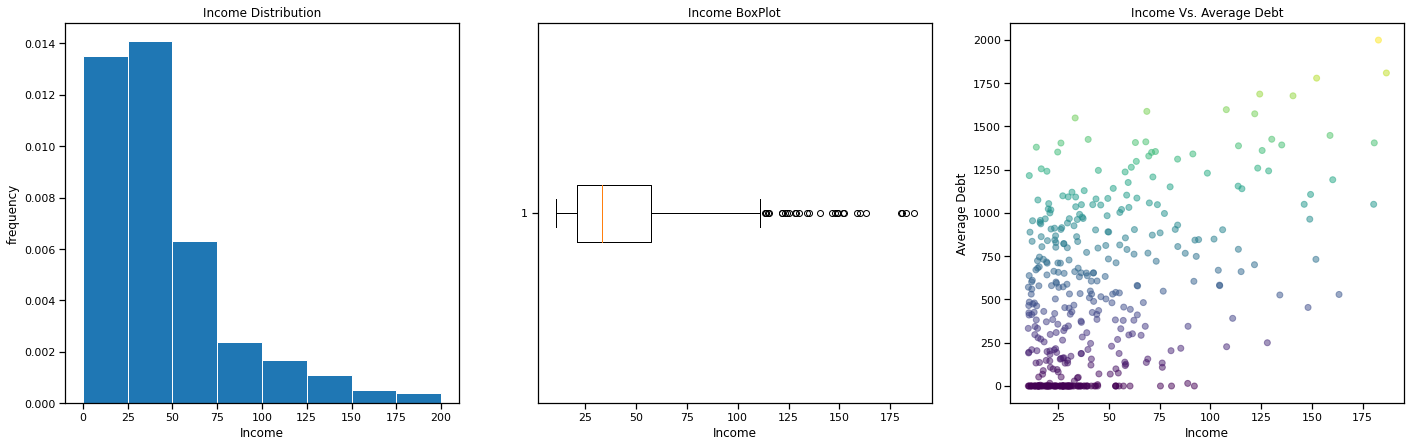

In [71]:
#plots & summary statistics for income
univariate_analysis(0,df)

>* This variable is highly assymetric (right skewed) which is common for income : the skewness of Income distribution is about 1.74.
>* Another indicator of this skewness is that the average Income is about \\$45,000 while 50\% of the individuals have an income below \\$33,000. <br/>
>* The lowest income is about \\$10,300 per year and the highest is \\$186,600 per year.

>### Credit_Limit :

Main stats of Credit_Limit :           Credit_Limit
count           400.00
mean           4735.60
std            2308.20
min             855.00
25%            3088.00
50%            4622.50
75%            5872.75
max           13913.00
skewness          0.84


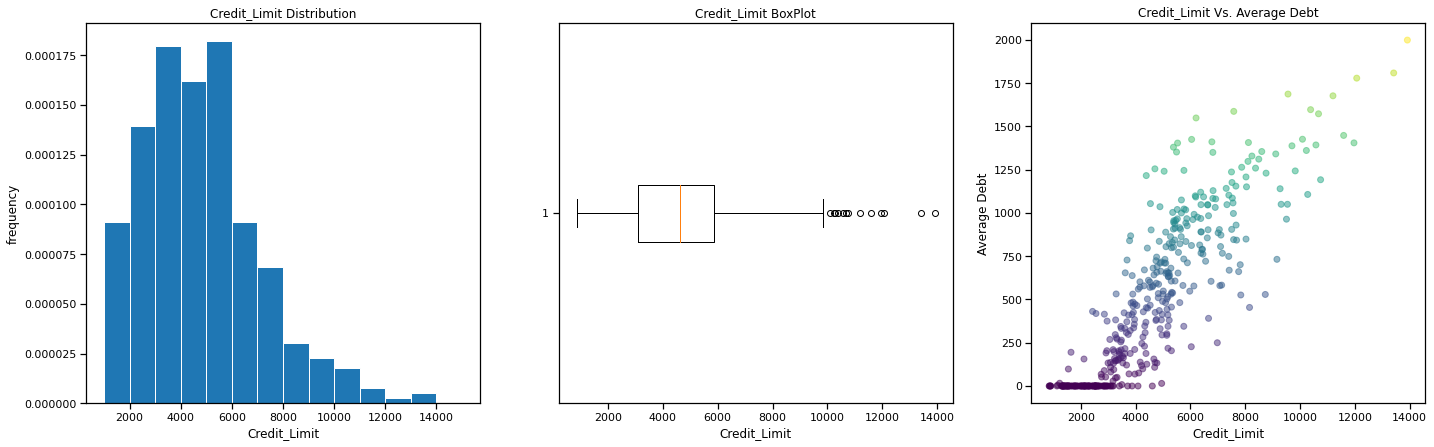

In [72]:
#plots & summary statistics for credit limit
univariate_analysis(1,df)

>* This variable is moderately assymetric (right skewed) : the skewness of credit limit is about 0.84. This is also reasonnable distribution for a credit rating. Indeed, this variable can be considered as an extension of the income as credit limits are generally granted on a financial health basis.
>* Another indicator of this skewness is that the average Credit Limit is about \\$4,735 while 50\% of the individuals have an income below \\$2,308. <br/>
>* The lowest credit limit value is \\$855 and the highest is \\$13813.

>### Rating :

Main stats of Rating :           Rating
count     400.00
mean      354.94
std       154.72
min        93.00
25%       247.25
50%       344.00
75%       437.25
max       982.00
skewness    0.87


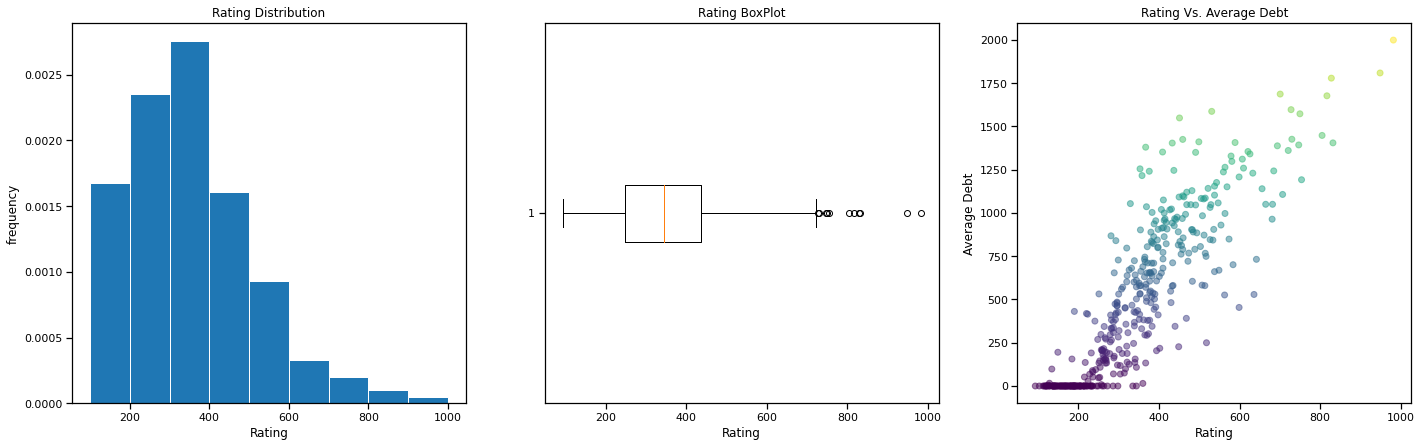

In [73]:
#plots & summary statistics for rating
univariate_analysis(2,df)

>* This variable is also assymetric (right skewed) : the skewness of rating is about 0.87. Indeed, this variable can be considered as an extension of the income as bank grades are generally granted on a financial health basis.
>* Another indicator of this skewness is that the average rating is about 354w while 50% of the dataset individuals have an income below 344. <br/>
>* The lowest credit limit is 93 and the highest is 982.

>### Cards :

Main stats of Cards :           Cards
count    400.00
mean       2.96
std        1.37
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        9.00
skewness   0.79


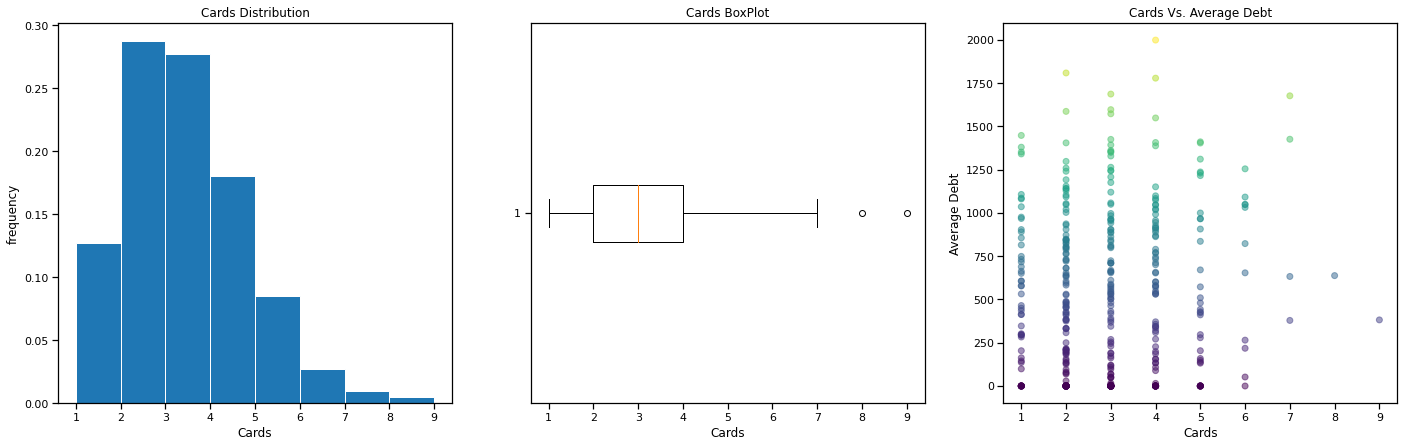

In [74]:
#plots & summary statistics for cards
univariate_analysis(3,df)


>* This variable is also assymetric (right skewed) : the skewness of rating is about 0.79.
>* We expected a different plot for the number of cards VS. average debt (in the 3rd plot). It seems that the value of AvgDebt does not affect the number of cards.
>* Card numbers takes only integers values. People have from 1 to 9 cards, but 75% of these 400 clients possess 4 cards or less.

>### Age :

Main stats of Age :             Age
count    400.00
mean      55.67
std       17.25
min       23.00
25%       41.75
50%       56.00
75%       70.00
max       98.00
skewness   0.01


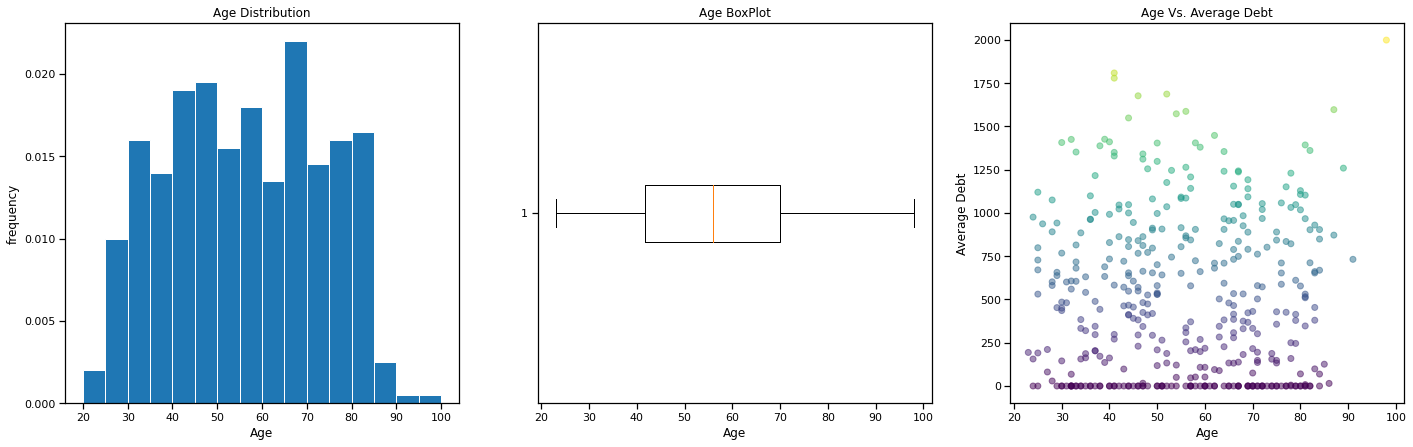

In [75]:
#plots & summary statistics for age
univariate_analysis(4,df)

>* These individuals are bank customers aged between 23 and 98. It seems that age is distributed rather symetrically (skewness = 0.01 !), and evenly from 30 to 85 years of age.
>* Individuals under 30 and over 85 are rather under-represented.

>### Education :

Main stats of Education :           Education
count        400.00
mean          13.45
std            3.13
min            5.00
25%           11.00
50%           14.00
75%           16.00
max           20.00
skewness      -0.33


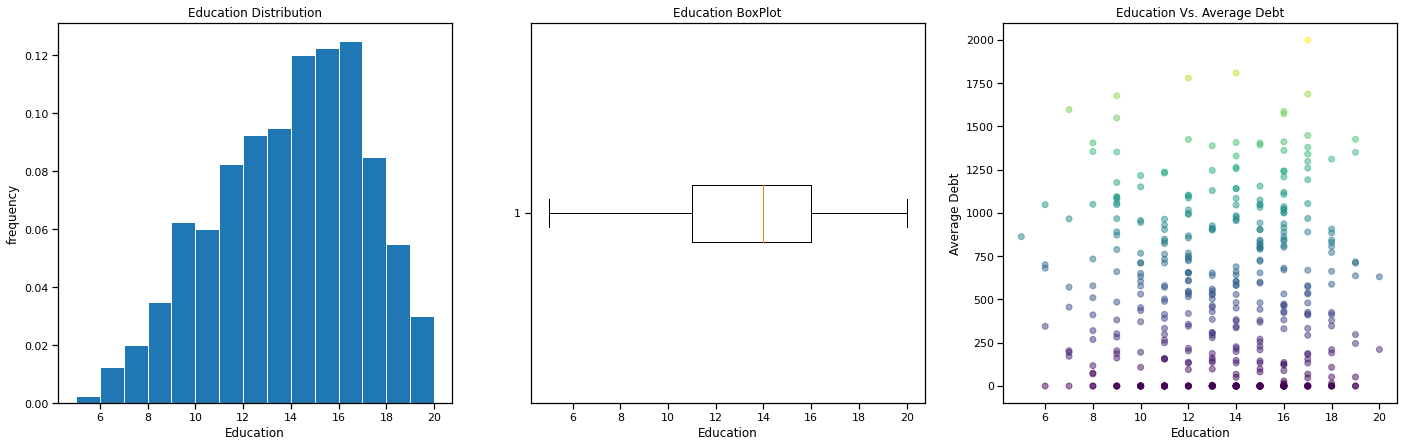

In [76]:
#plots & summary statistics for education
univariate_analysis(5,df)

>* The bank customers have followed between 5 and 20 academic years.
>* This variable is slightly asymmetrical since its skewness is about -0.33.
>* Very few individuals have less than 5 years of studies.

>### The dependent variable : the average debt :

Main stats of Average_Debt :           Average_Debt
count           400.00
mean            520.01
std             459.76
min               0.00
25%              68.75
50%             459.50
75%             863.00
max            1999.00
skewness          0.58


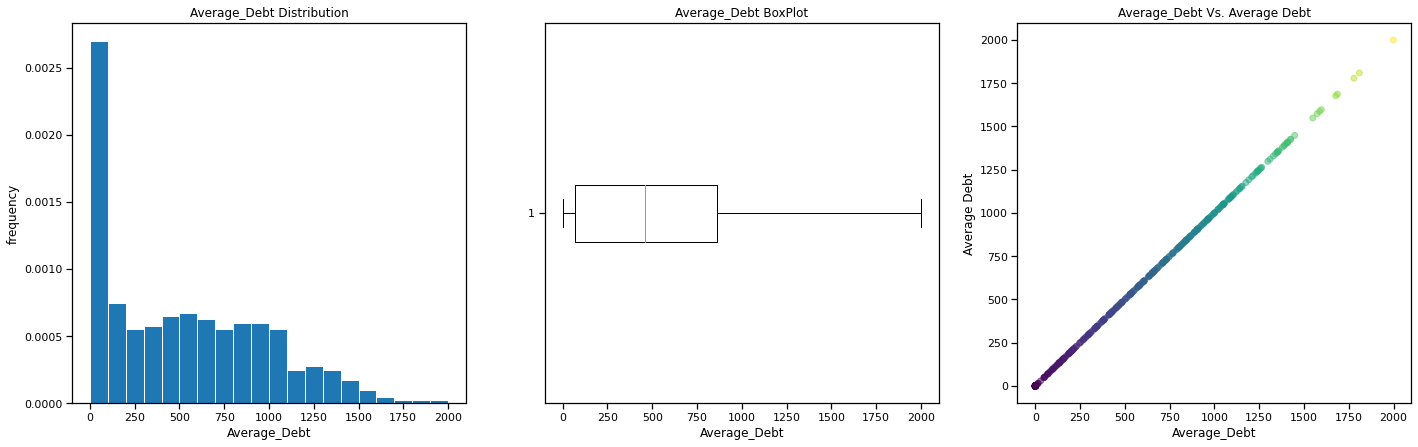

In [77]:
#plots & summary statistics for average debt
univariate_analysis(6,df)

>* This variable is moderately assymetric (right skewed) : the skewness of average debt is about 0.58. 
>* Another indicator of this skewness is that the maximum average debt in the dataset is about \\$1,999 but 75\% of the individuals have an average debt smaller than \\$863. 
>* We remark that 22.5% of the individuals from our dataset have an average debt of $0 : this shows that 

### D.2. Categorical (qualitative) variables
>### Preparation

In [78]:
def univariate_analysis_categorical(i,data):
    """
    This function creates a pie chart for a given dummy variable
    """
    dataframe = data.select_dtypes(include='object')
    sizes = dataframe.iloc[:,i].value_counts()
    labels =sizes.index
    explode = pd.Series([(0, 0.1),(0, 0.1),(0, 0.1),(0.1, 0.1,0.1)])
    fig1, ax1 = plt.subplots()
    fig1.set_facecolor('white')
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,explode = explode.iloc[i])

def categ_stats(data):
    """
    This function returns summary statistics for a given gategorical variable
    """
    dataframe = data.select_dtypes(include='object')
    categ_stats = dataframe.describe()
    categ_stats.loc['prop_top'] = (categ_stats.loc['freq'])*100/(categ_stats.loc['count'])
    return(categ_stats)

>### Gender

count          400
unique           2
top         Female
freq           207
prop_top     51.75
Name: Gender, dtype: object

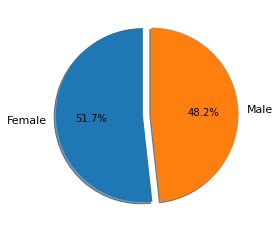

In [79]:
#Pie chart & statistics for Student
univariate_analysis_categorical(0,df2)
categ_stats(df2).iloc[:,0]

>* Gender is homogeneously distributed in our dataset : there is 51.7% of females (207) and 48.2% of males (193).

>### Student

count        400
unique         2
top           No
freq         360
prop_top   90.00
Name: Student, dtype: object

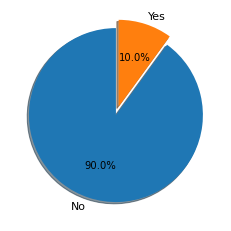

In [80]:
#Pie chart & statistics for Gender
univariate_analysis_categorical(1,df2)
categ_stats(df2).iloc[:,1]

>* 10% of the sample individuals are students (40/400)

>### Married

count        400
unique         2
top          Yes
freq         245
prop_top   61.25
Name: Married, dtype: object

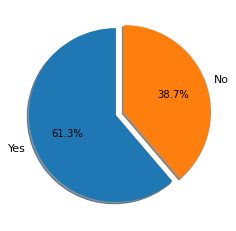

In [81]:
#Pie chart for gender & statistics for marital status
univariate_analysis_categorical(2,df2)
categ_stats(df2).iloc[:,2]

>* About 60% of the individuals are married (245/400).

>### Ethnicity

count             400
unique              3
top         Caucasian
freq              199
prop_top        49.75
Name: Ethnicity, dtype: object

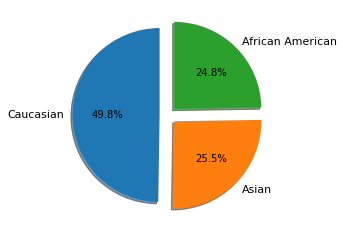

In [82]:
#Pie chart for gender & statistics for ethnicity
univariate_analysis_categorical(3,df2)
categ_stats(df2).iloc[:,3]

>* About the half of the sample individuals are caucasian (199), a quarter are asian and the last quarter are african american.

### E. Bivariate analysis
>In this section, we will try to plot insightful graphics to try finding patterns

#### Preparation
> * In this first code cell, we create a 'log of income' variable in order to visualize its skewed distribution differently and posssibly to find paterns.
> * We create a "avg debt = 0" dummy variable named "null_debt" to investigate more on the differences between individuals having null debts (22.5%) and others individuals.
> * Then, we rearange the columns order
>Finally, we create a function, mat_val, which returns the correlation in a range of absolute value (ex : from 0.2 to 0.8). It helps us not to return duplicates.

In [83]:
#Cration of variables log income
df["Log_Income"],df2["Log_Income"]=np.log(df["Income"]),np.log(df2["Income"])

#Cration of variables null average debt
df2["Null_Debt"]=np.where(df2["AvgDebt"]!=0,0,1)

#Rearangement of columns orders
order = ['Average_Debt','Null_Debt', 'Income','Log_Income','Credit_Limit', 'Rating', 'Age', 'Education','Cards' ,'Student','Male', 'Married', 'Ethnicity_Asian', 'Ethnicity_Caucasian']
df = df.reindex(columns=order )

order_2 = ['AvgDebt','Null_Debt','Income','Log_Income', 'Limit', 'Rating',  'Age', 'Education','Cards','Student', 'Gender', 'Married', 'Ethnicity']
df2 = df2.reindex(columns = order_2 )

#Function to get correlations in a certain range 
def mat_val(matrice, tresh_low, tresh_high):
    """
    Returns the correlations coeficients of a correlation matrix in a range of absolute value (ex : from 0.7 to 1 of absolute value of correlation coeficient). 
    """
    a, b = matrix.shape
    max_valeurs,ind = [], []
    for i in range(a):
        for j in range(b):
            if i<j:
                var = matrice.iloc[i,j]
                if ((var>= tresh_low)&(var<= tresh_high)):
                    max_valeurs.append(var)
                    ind.append(matrice.columns[i]+" - " + matrice.columns[j])

                elif ((var<= -tresh_low)&(var>= -tresh_high) ):
                    max_valeurs.append(var)
                    ind.append(matrice.columns[i]+" - " + matrice.columns[j])

    retour = pd.DataFrame(max_valeurs, index =ind,columns =['Max'])
    return(retour)  

#### E.1. Correlation matrix & highest absolute values

>We plot the correlation matrix between all variables
>We plot the high values (absolute correlation coeficient between 0.5 and 1) :

<AxesSubplot:>

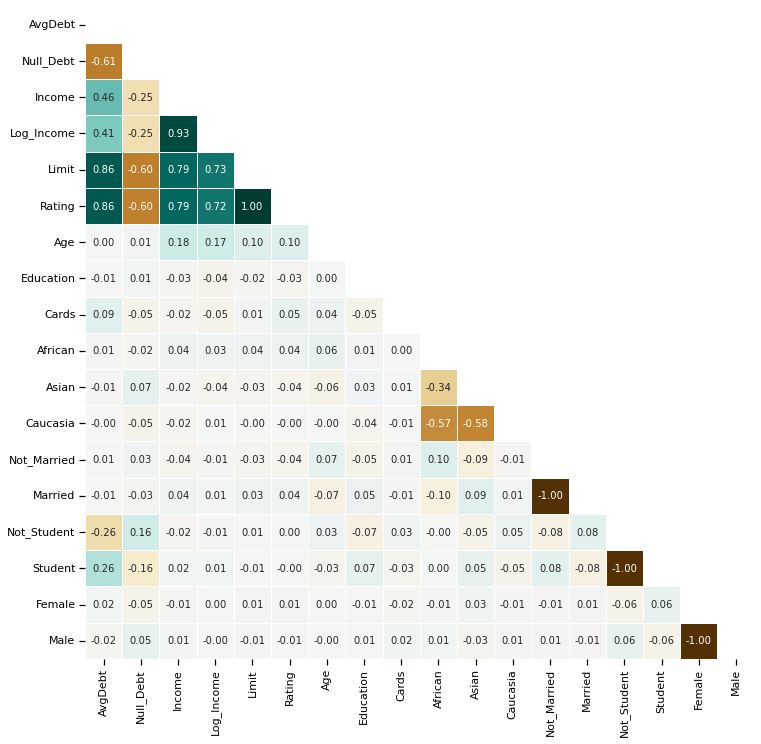

In [84]:
#we plot every variables
df3=df2.copy()
df3 = pd.get_dummies(df3,columns = ["Ethnicity","Married", "Student", "Gender"], drop_first = False)
df3.rename(columns={"Married_No":"Not_Married","Married_Yes":"Married","Ethnicity_African American": "African","Ethnicity_Caucasian" : "Caucasia", "Ethnicity_Asian" : "Asian", "Student_No":"Not_Student","Student_Yes":"Student","Gender_Male":"Male","Gender_Female":"Female"}, inplace = True)

#Plot of a correlation matrix 
fig, ax = plt.subplots(figsize = (12, 12))
matrix = df3.corr()

sns.heatmap(matrix, annot = True, fmt = '.2f', mask = ~np.tri(matrix.shape[1], k = -1, dtype = bool), cbar = False, ax = ax,linewidths=.5, cmap = "BrBG")

In [85]:
#correlation coeficients from 0.6 to 1 in aboslute value
mat_val(matrix,0.6,1)

Max
AvgDebt - Null_Debt   -0.61
AvgDebt - Limit        0.86
AvgDebt - Rating       0.86
Null_Debt - Limit     -0.60
Null_Debt - Rating    -0.60
Income - Log_Income    0.93
Income - Limit         0.79
Income - Rating        0.79
Log_Income - Limit     0.73
Log_Income - Rating    0.72
Limit - Rating         1.00
Not_Married - Married -1.00
Female - Male         -1.00

In [86]:
#correlation coeficients from 0 to 0.6 in aboslute value
mat_val(matrix,0,0.6)

Max
AvgDebt - Income      0.46
AvgDebt - Log_Income  0.41
AvgDebt - Age         0.00
AvgDebt - Education  -0.01
AvgDebt - Cards       0.09
...                    ...
Married - Male       -0.01
Not_Student - Female -0.06
Not_Student - Male    0.06
Student - Female      0.06
Student - Male       -0.06

[139 rows x 1 columns]

#### From this matrix, we retreive all the correlation coeficients :
1. from .15 to 0.6 in absolute value 
2. from .6 to 1 in absolute value 

>#### To note :
>* ***correl(Limit - Rating) = 1.00*** <br>
The credit limit and the customer rating have a +1 correlation coeficient, which is the case when variables have a perfect positiv relationship - linear relationship : ∃ k / limit = k.rating for every individuals -.
Credit limit and customer rating are both variables allocated by the banking administration, probably that thee credit limit is proportional to the rating.
It also means that it would be redundant too keep both credit limit and rating in our model.
>* ***correl(AvgDebt - Limit)	= 0.86 & correl(AvgDebt - Rating) = 0.86***<br>
Correlation between average debt and limit and rating is 0.86. It is logical that the coeficient is the same because correl(Limit - Rating) = 1.00. This is also logical that this correlation is prety high because average debt depens on the debt limit (and the rating since their correlation coef is 1).
>* ***correl(Income - Limit)	= 0.79 & correl(Income - Rating) = 0.79***<br>
Correlation between income and rating is high (which is logical as credit limits / rating are generally increasing on a financial health basis.
>* ***correl(AvgDebt - Income) = 0.46***<br>
Correlation between income and avg debt is moderate and positive.
>* ***correl(AvgDebt - Student) = 0.26***<br>
The dummy variable "Student" is lightly positivly related to the average debt. There is probably a "student effect".
>* ***correl(Income - Age) = 0.18***<br>
The variable "age" is slightly positivly related to the average debt. We will investigate on this later on
>* ***Small absolute values of correlation coeficient***<br>
The correlation coeficient of Avg_Debt & other variables are surprisingly close to 0 for Age, Education, Number of cards, but also categorical variables such as Married, Ethnicity, Gender

#### E.2. Scatter plots and observations

>In this section, we will plot pairwise scatterplot grids for :
>>* Numerical variables with linear regression model fits
>>* Cross-sectional proportions graphs for categorical variables.

>We will use "hue" views with the hope to find some patterns.
>#### 1. no hue
>1st, let us plot the basic pairgrid (without hue)

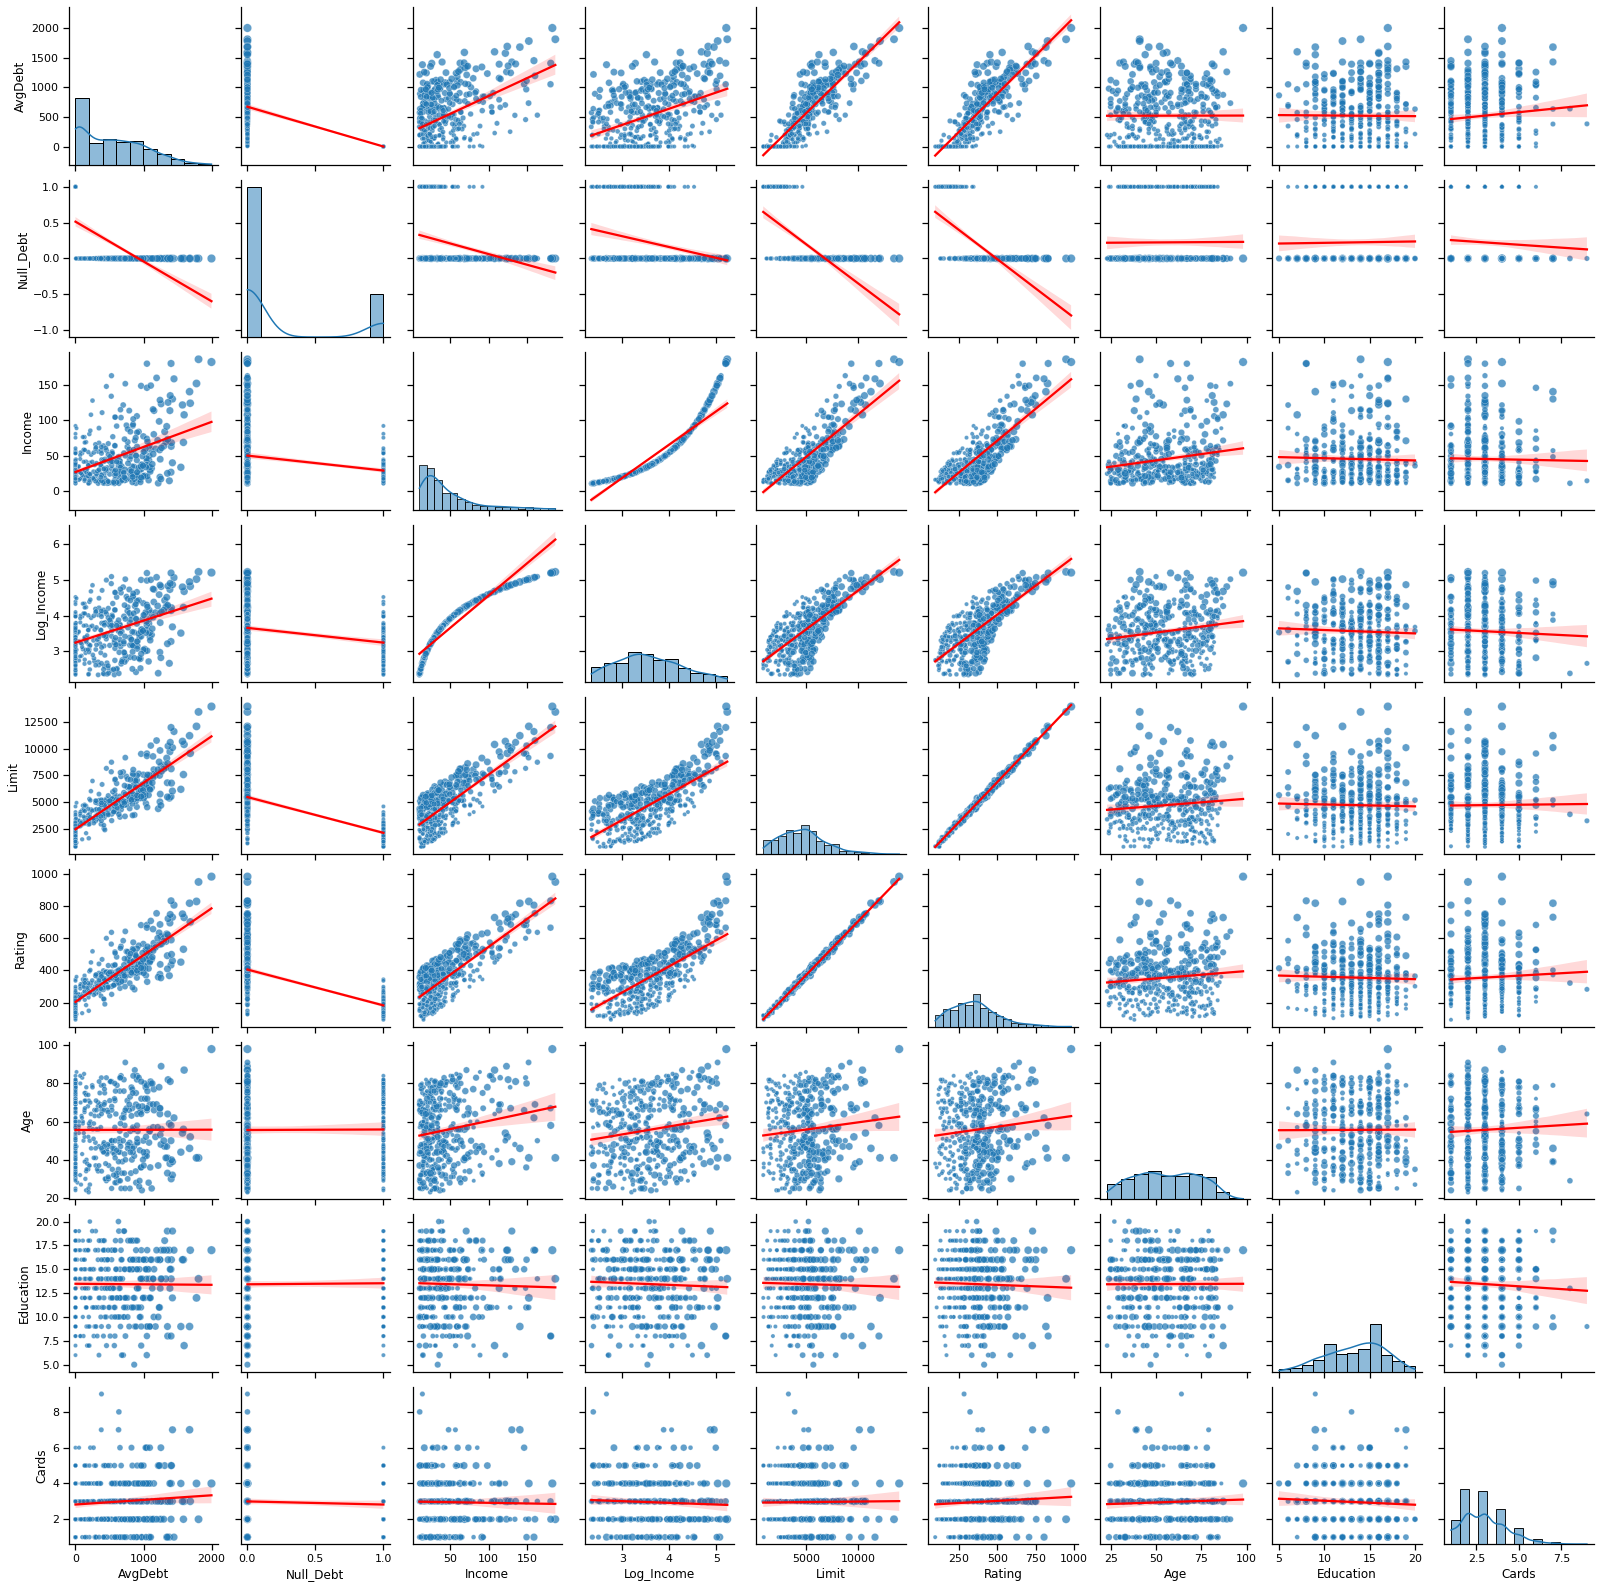

In [26]:
#grid, no hue
g = sns.PairGrid(df2)

#lower & upper part of the grid : scatter plots
g.map_lower(sns.scatterplot, linewidths = 1, edgecolor = 'w',  alpha =0.7,s=40, size = df2["AvgDebt"])
g.map_lower(sns.regplot,color= "r",scatter = False)
g.map_upper(sns.scatterplot, linewidths = 1, edgecolor = 'w',  alpha =0.7,s=40, size = df2["AvgDebt"])
g.map_upper(sns.regplot,color= "r",scatter = False)

#histograms
g.map_diag(sns.histplot, kde= 'True', fill = True)

<AxesSubplot:xlabel='Rating', ylabel='AvgDebt'>

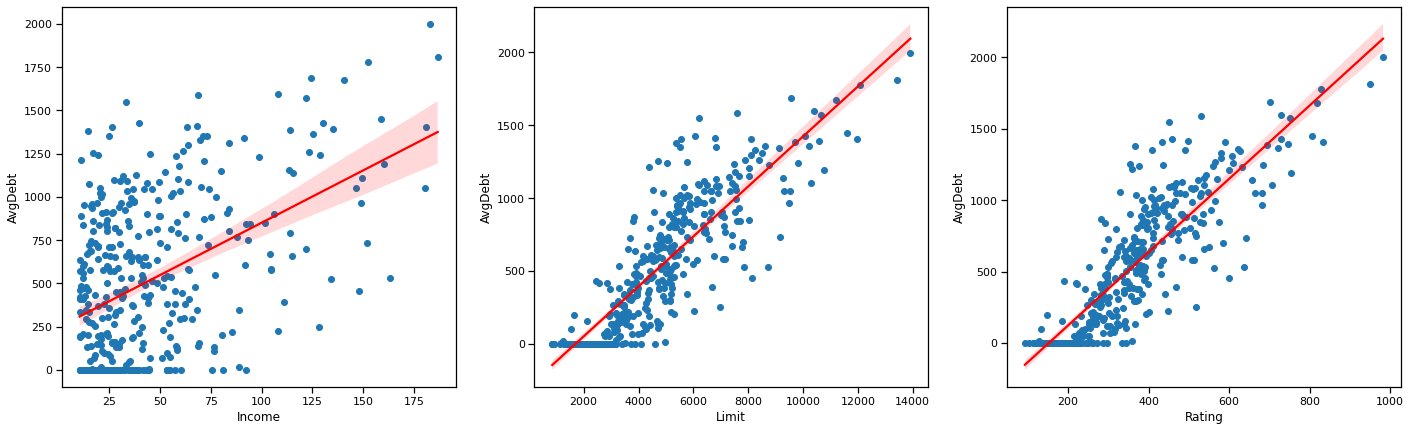

In [27]:
x1 = df2["Income"]
x2 = df2["Limit"]
x3 = df2["Rating"]
y = df2["AvgDebt"]

fig, axs = plt.subplots(1,3)
fig.set_size_inches(24, 7)
#histogram plot
axs[0].scatter(x1, y)
sns.regplot( x = x1,y = y,color= "r",scatter = False, ax = axs[0])
axs[1].scatter(x2, y)
sns.regplot( x = x2,y = y,color= "r",scatter = False, ax = axs[1])
axs[2].scatter(x3, y)
sns.regplot( x = x3,y = y,color= "r",scatter = False, ax = axs[2])

>* We observe only positiv relationships (simple regression fit plot) among average debt, income, rating/limit
>* We observe no simple linear relationship/pattern between other numerical variables & average debt
>* If we do not find other arguments for a linear relationship between these variables and the average debt, we will probably not use them in the model.

>#### 2. Hue = student
>* In the next cell, we plot pairwise diagrams (scatter plot & histograms) for every numerical variables with a hue on "Student" 

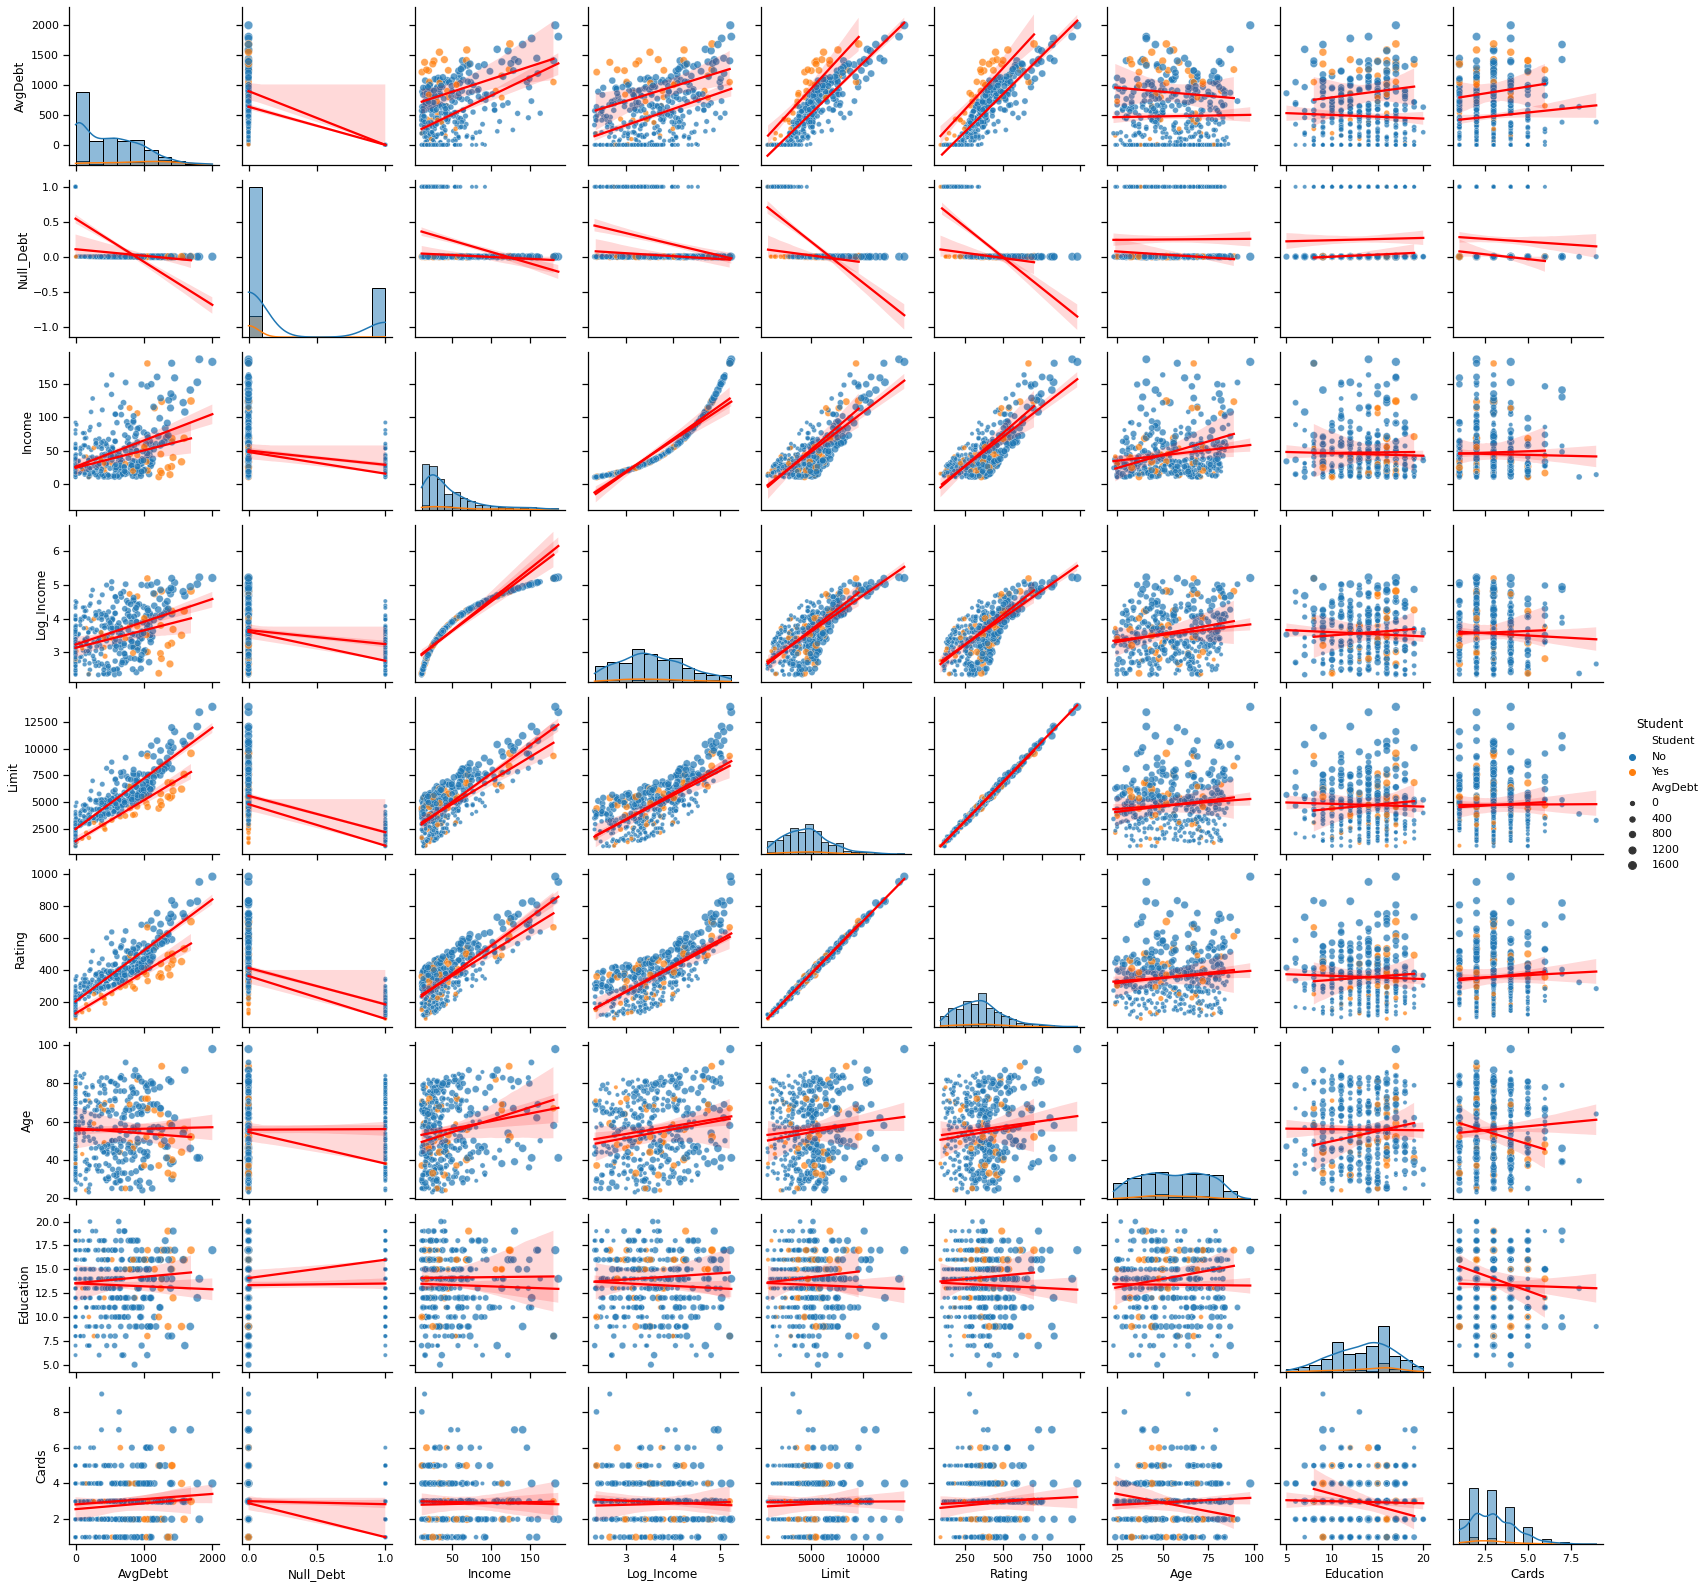

In [28]:
#grid, hue on student status
g = sns.PairGrid(df2,hue='Student')

#lower & upper part of the grid : scatter plots
g.map_lower(sns.scatterplot, linewidths = 1, edgecolor = 'w',  alpha =0.7,s=40, size = df2["AvgDebt"])
g.map_lower(sns.regplot,color= "r",scatter = False)
g.map_upper(sns.scatterplot, linewidths = 1, edgecolor = 'w',  alpha =0.7,s=40, size = df2["AvgDebt"])
g.map_upper(sns.regplot,color= "r",scatter = False)

#histograms
g.map_diag(sns.histplot, kde= 'True', fill = True)

g.add_legend()

>* It seems that, at equal average debt levels, students have lower Credit limit & Rating than non students (by a fixe value)

>#### 2. Null debt
>* In the next cell, we plot pairwise diagrams (scatter plot & histograms) for every numerical variables with a hue on "Null debt" 

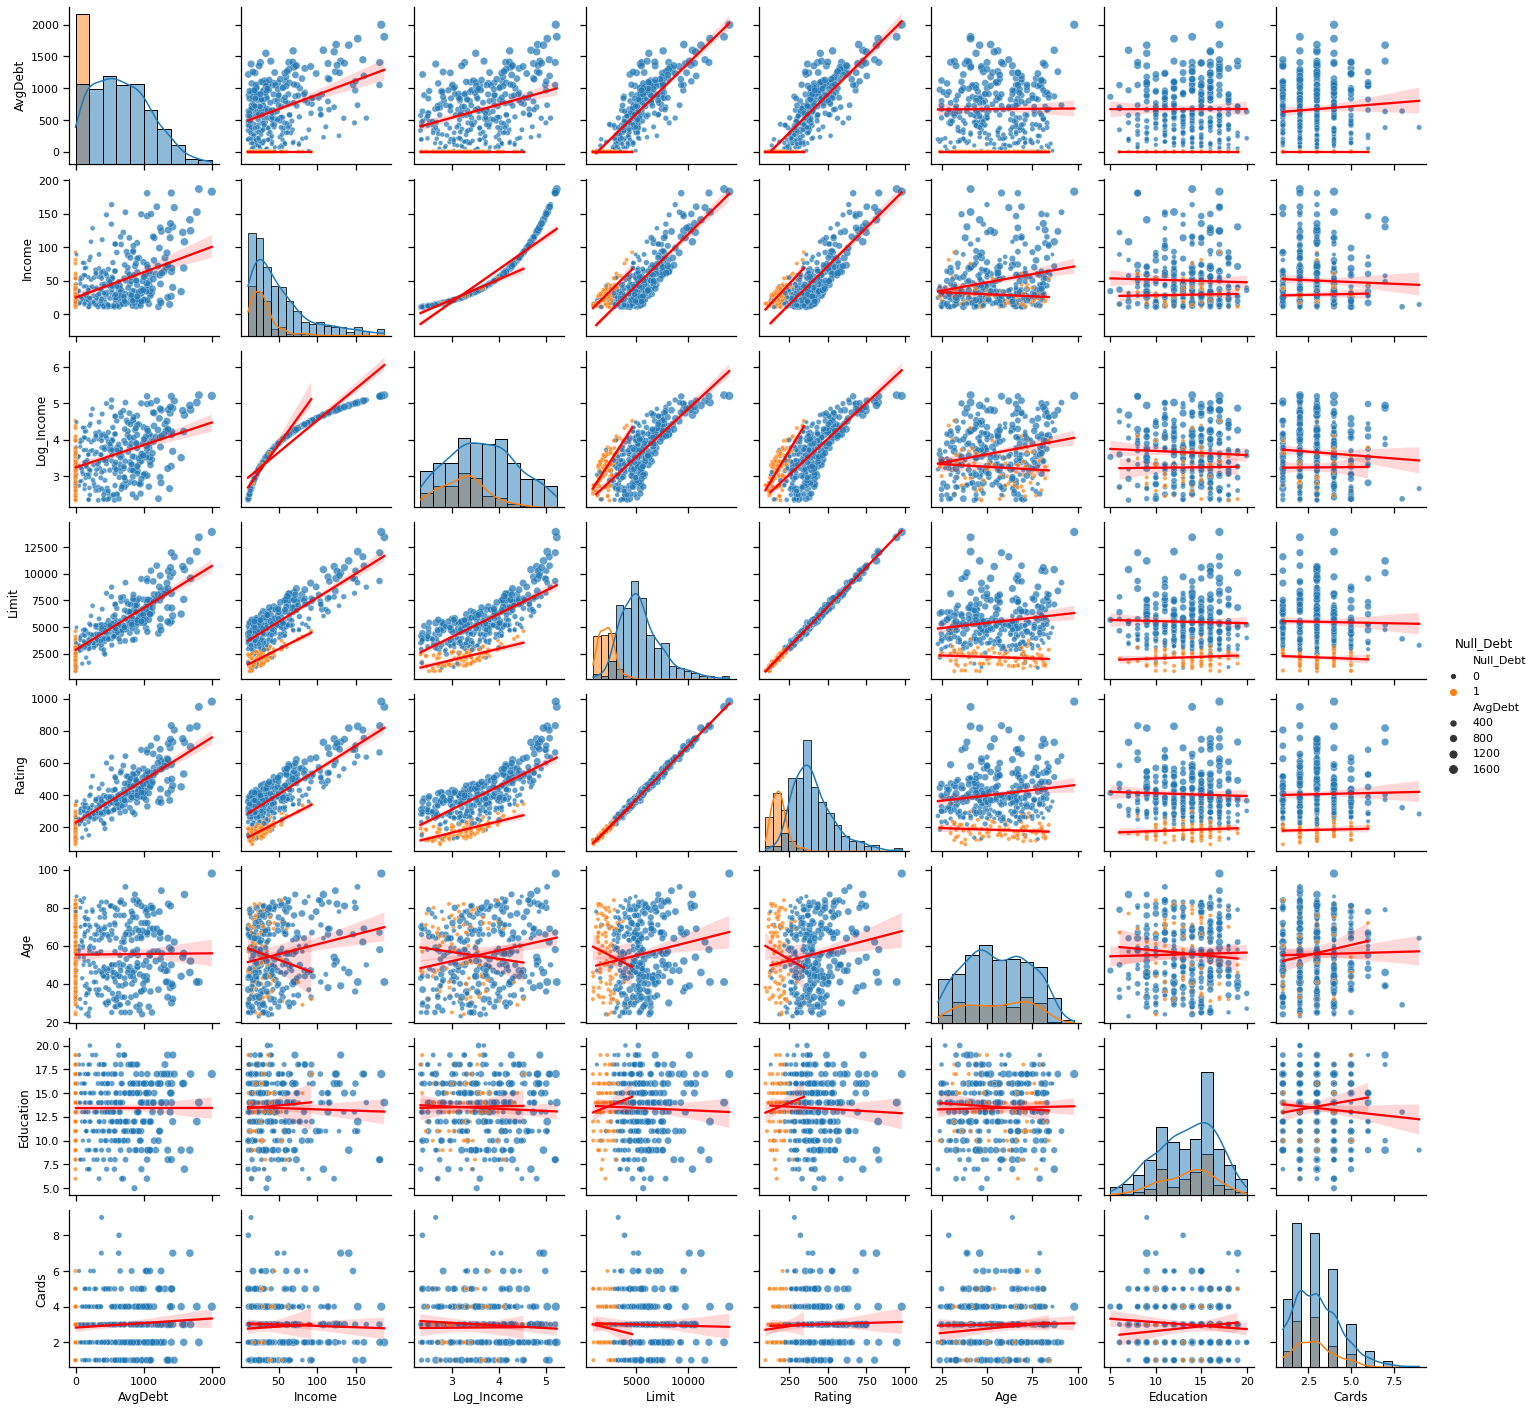

In [29]:
#grid, hue on null debt
g = sns.PairGrid(df2,hue='Null_Debt')

#lower & upper part of the grid : scatter plots
g.map_lower(sns.scatterplot, linewidths = 1, edgecolor = 'w',  alpha =0.7,s=40, size = df2["AvgDebt"])
g.map_lower(sns.regplot,color= "r",scatter = False)
g.map_upper(sns.scatterplot, linewidths = 1, edgecolor = 'w',  alpha =0.7,s=40, size = df2["AvgDebt"])
g.map_upper(sns.regplot,color= "r",scatter = False)

#histograms
g.map_diag(sns.histplot, kde= 'True', fill = True)

g.add_legend()

>It appears that the income levels and credit rating/limit levels of those with zero debt are in smaller ranges than those with positive average debt which is logical.

>After drawing the same pairwise diagrams (but using gender, ethnicity and marital status as a 'hue'), we decide not to draw them since we did not find any remarkable classification and in order to follow the principle of parsimony.

#### Cross-sectional proportions graphs for categorical variables.

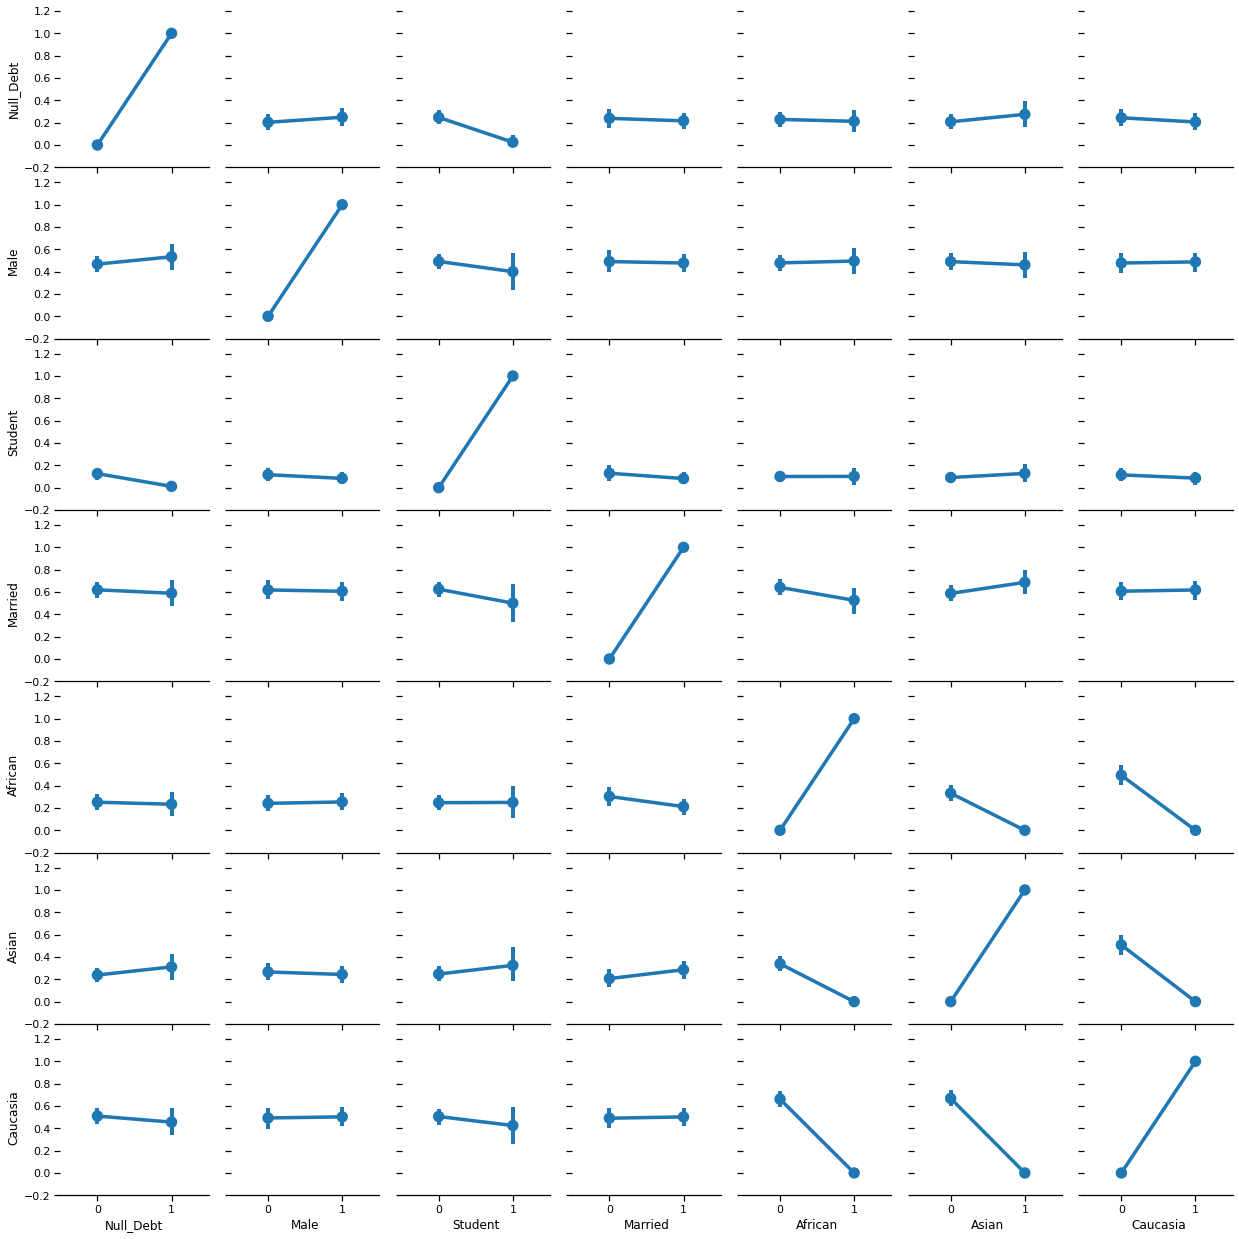

In [30]:
cat_col=['Null_Debt','Male','Student', 'Married','African', 'Asian','Caucasia']
g = sns.PairGrid(df3[cat_col])
g.map(sns.pointplot, scale=1.3, errwidth=4)
g.set(ylim=(-0.2, 1.2))
sns.despine(fig=g.fig, left=True)

>Here again, we are surprised not to find any remarkable cross-sectional proportion difference in the dataset.<br><br>
>***Why is this surprising ?***<br>
>It is well known that a large number of economic inequalities exist between different genders, ethnicities, but also that students should not be married almost as much as unmarried etc.

> ***This bivariate analysis has 2 conclusions:***<br><br>
>> #### 1. The variables and the model
>> * The likely relevance of the Income, Limit/Rating, Student status for a linear regression model
>> * The likely irrelevance of age, education, number of cards, ethnicity, marital status for a linear regression model

>> #### 2. This is an odd dataset
>> * It is well known that a large number of economic inequalities exist between different genders, ethnicities, but also that students should not be married almost as much as unmarried etc. This dataset has many other suspicious aspects. For example, the variable "student" does not seem to correspond to particular age groups
>> *We would have expected more patterns, more linear looking relationship
>> *We are limited by this data set to build a linear regression model. With these data, the model in question is probably highly questionable. The question of data quality or at least missing variables can be asked.

# 2. Create a Multiple Linear Regression Model to explain the dependent variable average credit card debt (AvgDebt)

> In this section, we will select our model features by évaluating their performances and signifiances

### A. Choice of Variables : backward features selection:

>The backward features elimination is a variable selection method in which we:
>* Start with a model containing all possible variables 
>* Then, we begin to remove the least significant variables one after the other
>* Finally, we stop removing variables when we can't remove an additional variable without deteriorating the model performance

>#### We start with every variable (numerical and categorical):

In [13]:
#in this cell
model_every_var = smf.ols(formula = 'AvgDebt ~ Income + Limit + Rating + Age + Education + Cards + African + Asian + Married + Male + Student',data =  df3)
model_every_var_fit = model_every_var.fit()
model_every_var_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          1.11e-253
Time:                        21:28:18   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -479.7541     34.717    -13.819      0.000    -548.012    -411.497
Income        -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit          0.1909      0.033      5.824      0.000       0.126       0.255
Rating         1.1365      0.491      2.315      0.021       0.171       2.102
Age           -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education     -1.0989      1.598     -0.688      0.492      -4.241       2.043
Cards         17.7245      4.341      4.083      0.000       9.190      26.259
African      -10.1070     12.210     -0.828      0.408     -34.113      13.899
Asian          6.6972     12.122      0.552      0.581     -17.137      30.531
Married       -8.5339     10.363     -0.824      0.411     -28.908      11.841
Male          10.6532      9.914      1.075      0.283      -8.839      30.145
Student      425.7474     16.723     25.459      0.000     392.869     458.626
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>As we have stuffed our model with all possible variables, we won't interpret the results. For now, but we continue to drop some variables :
>* Education, Ethnicity (African & Asian), Married, and Male have p.values of at least 21% :  a p-value greater than 5% - 100-95%, 95% being the "usual" confidence level - indicates that it is not possible to reject the null hypothesis H0: "the coefficient of the variable is equal to 0". In other words, it cannot be established that this coefficient is significantly different from 0 for these variables<br><br>
>We conssequently decide to drop these variables.

In [14]:
model_less_var = smf.ols(formula = 'AvgDebt ~ Income + Limit + Rating + Age + Cards + Student',data =  df3)
model_less_var_fit = model_less_var.fit()
model_less_var_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          1.58e-260
Time:                        21:28:19   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -493.7342     24.825    -19.889      0.000    -542.540    -444.928
Income        -7.7951      0.233    -33.395      0.000      -8.254      -7.336
Limit          0.1937      0.032      5.981      0.000       0.130       0.257
Rating         1.0912      0.485      2.251      0.025       0.138       2.044
Age           -0.6241      0.292     -2.139      0.033      -1.198      -0.050
Cards         18.2119      4.319      4.217      0.000       9.721      26.702
Student      425.6099     16.510     25.780      0.000     393.152     458.068
==============================================================================
Omnibus:                       34.091   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.623
Skew:                           0.772   Prob(JB):                     1.51e-09
Kurtosis:                       3.225   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>Our model is hardly affected by the removal of these variables, as one would expect

>Whe previously detected that the rating is perfectly correlated to the limit
>* We consequently drop the rating from our model, in order to avoid redundancy and collinearity 
>* It is irrelevant whether we abandon the limit or the rating.

In [15]:
model_no_rating = smf.ols(formula = 'AvgDebt ~ Income + Limit  + Age + Cards + Student',data =  df3)
model_no_rating_fit = model_no_rating.fit()
model_no_rating_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1638.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          4.59e-261
Time:                        21:28:20   Log-Likelihood:                -2403.1
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -467.3345     21.992    -21.250      0.000    -510.570    -424.099
Income        -7.7595      0.234    -33.149      0.000      -8.220      -7.299
Limit          0.2661      0.004     75.296      0.000       0.259       0.273
Age           -0.6220      0.293     -2.120      0.035      -1.199      -0.045
Cards         23.5504      3.628      6.492      0.000      16.418      30.682
Student      428.3786     16.548     25.886      0.000     395.844     460.913
==============================================================================
Omnibus:                       38.356   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.678
Skew:                           0.818   Prob(JB):                     7.31e-11
Kurtosis:                       3.354   Cond. No.                     2.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The performance is once again barely lower: the Rating variable - although highly correlated with the AvgDebt variable - was indeed redundant.

>***Next steps:***<br>
>All variables are significant to our model with a level of confidence that is acceptable. We still need to discuss some variables:

>### Results:
>#### Overall performance:
R2 is extremly high (95%), which can reasonably be considered too high.<br>It is likely that this model contain a simultaneity issue, i.e. that the Limit variable (which has the highest corellation coeficient with Average Debt) depends on average debt (maybe the average debt from the last period in a banking environment)
>#### Interpretation of βs:

In [16]:
model_no_rating_fit.params

Intercept   -467.33
Income        -7.76
Limit          0.27
Age           -0.62
Cards         23.55
Student      428.38
dtype: float64

* Income marginal effect :<br>
>All things being equal, in our model, an adittional \\$1000 in yearly income decreases the average debt by about \\$7.5.
* Limit marginal effect :<br>
>All things being equal, in our model, an adittional $1 in debt limit increases the average debt by about \\$0.3.
* Age marginal effect :<br>
>All things being equal, in our model, an adittional 1 year in age decreases the average debt by about \\$0.6.
* Cards marginal effect :<br>
>All things being equal, in our model, an adittional 1 card increases the average debt by about \\$23.5.
* Student effect : <br>
>All things being equal, in our model, the average debt for student individuals is about \\$430 higher than for non student.

#### Since all variables do not have the same scale, we can try to get a broader view of the impact of these variables on our estimations:

In [88]:
#in this cell, we compute the average effect of numerical variables (formula : marginal effect * average value of each numerical variable)
meanz  = [1]
for col in ['Income','Limit','Age','Cards']:
    meanz.append(df3[col].mean() )
    
ind = ['Intercept','Income','Limit','Age','Cards']
meanz = pd.DataFrame([1.00,45.22,4735.6,55.67,2.96], index = ind, columns = ["Average"])
paramz = pd.DataFrame(model_no_rating_fit.params,index= ind, columns = ["Coeficient"])
tab = pd.concat([meanz, paramz], axis=1)
tab["Average effect"] = tab["Average"]*tab["Coeficient"]
tab.drop(columns = 'Average')

Coeficient  Average effect
Intercept     -467.33         -467.33
Income          -7.76         -350.89
Limit            0.27         1260.36
Age             -0.62          -34.63
Cards           23.55           69.71

>We estimate the effect of each variable on the predictions of our model. It seems - as the bivariate analysis suggested - that the Age and Cards variables have little effect on the estimated average debt.
>However, each of these two variables is significant for the model according to the p-values. Therefore, we decide to keep them.

#### The case of the limit

>It is likely that this model contain a simultaneity issue, i.e. that the Limit variable (which has the highest corellation coeficient with Average Debt) depends on average debt (maybe the average debt from the last period in a banking environment).

This could explain the very high R2: 
let's see what happens if we create a simple regression model with Limit only:

In [89]:
model_limit = smf.ols(formula = 'AvgDebt ~ Limit',data =  df3)
model_limit_fit = model_limit.fit()
model_limit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          2.53e-119
Time:                        21:57:10   Log-Likelihood:                -2748.0
No. Observations:                 400   AIC:                             5500.
Df Residuals:                     398   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -292.7905     26.683    -10.973      0.000    -345.249    -240.332
Limit          0.1716      0.005     33.879      0.000       0.162       0.182
==============================================================================
Omnibus:                       22.506   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.676
Skew:                           0.418   Prob(JB):                     4.87e-08
Kurtosis:                       4.150   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>Indeed, the limit alone explains more than 74% of the variability of the average debt!

>At this point, we have 2 options: 
>>* To build a model with Limit and taking the risk of estimating the average debt ***mostly*** thanks to a variable that could depend on the target variable (what might not make sense)
>>* To build a model without Limit and losing a lot of performance.

>We have already done the first one ('model_no_rating' model), let's try without Limit :

In [90]:
model_no_limit = smf.ols(formula = 'AvgDebt ~ Income  + Age + Cards + Student',data =  df3)
model_no_limit_fit = model_no_limit.fit()
model_no_limit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     41.06
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           8.87e-29
Time:                        21:57:11   Log-Likelihood:                -2949.8
No. Observations:                 400   AIC:                             5910.
Df Residuals:                     395   BIC:                             5930.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    214.0498     78.530      2.726      0.007      59.661     368.439
Income         6.1887      0.561     11.038      0.000       5.086       7.291
Age           -2.0894      1.147     -1.822      0.069      -4.344       0.165
Cards         35.2163     14.200      2.480      0.014       7.299      63.133
Student      382.8252     64.793      5.908      0.000     255.443     510.207
==============================================================================
Omnibus:                       99.924   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.173
Skew:                           0.212   Prob(JB):                     2.52e-05
Kurtosis:                       1.955   Cond. No.                         318.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>* Age has a p.values of about 7% : a p-value greater than 5% : in this model, the H0 hypothessis "the coefficient is significantly different from 0" can't be accepted.<br>
>* We consequently drop this variable, according to our first intuition from bivariate analysis.

In [91]:
model_no_limit = smf.ols(formula = 'AvgDebt ~ Income + Cards + Student',data =  df3)
model_no_limit_fit = model_no_limit.fit()
model_no_limit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     53.33
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           5.69e-29
Time:                        21:57:12   Log-Likelihood:                -2951.5
No. Observations:                 400   AIC:                             5911.
Df Residuals:                     396   BIC:                             5927.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.0507     53.509      2.038      0.042       3.853     214.248
Income         6.0079      0.553     10.856      0.000       4.920       7.096
Cards         34.0246     14.226      2.392      0.017       6.056      61.993
Student      386.6804     64.948      5.954      0.000     258.995     514.366
==============================================================================
Omnibus:                      118.554   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.512
Skew:                           0.217   Prob(JB):                     1.29e-05
Kurtosis:                       1.922   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


#### Conclusion
>We finally have 2 models: 
>* One that explains a high proportion of variability (about 95%) in the average debt for which we are not sure of the relevance (more context is needed for the variable Limit).
>* A model that explains much less variability (about 29%) in the average debt, but for which all variables are really relevant.

#### Continuation : idea to predict better
>One idea would be to bypass the high proportion of null average debt by classifying the individuals in 2 categories 'null average debt' and 'non-null average debt' before doing our linear regression

>In the multivariate analysis, we remarked that income levels and credit rating/limit levels of individuals with zero debt are in smaller ranges than those with positive average debt which is logical.

>Let us try to do this with logistic regression : we can see that min and max of limit and income are far smaller for null debt individuals.
>As mentionned above, the limit and the income should be good predictors for the nullity of average_debt

In [92]:
#we observe min and max value for income & limit
col =  ['Income', 'Limit']
null_debt_summary = df3[df3['Null_Debt']==1].describe()
non_null_debt_summary = df3[df3['Null_Debt']==0].describe()
null_debt_summary[col], non_null_debt_summary[col]

(       Income   Limit
 count   90.00   90.00
 mean    28.82 2152.72
 std     15.36  744.85
 min     10.36  855.00
 25%     18.26 1554.25
 50%     27.14 2135.00
 75%     34.71 2579.75
 max     92.11 4612.00,
        Income    Limit
 count  310.00   310.00
 mean    49.98  5485.47
 std     37.88  2052.45
 min     10.35  1160.00
 25%     23.15  3976.25
 50%     37.14  5147.00
 75%     63.74  6453.25
 max    186.63 13913.00)

> In the cell below, we create a logistic regression model to estimate whether or not the individuals have a \\$0 average debt. 
> We use income & limit as predictors as discussed before

>

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear',C=10,  random_state=0)
logit_columns =['Income', 'Limit']
x = df3[logit_columns]
y = df3["Null_Debt"]
model.fit(x, y)
predictions = model.predict_proba(x)
pd.DataFrame(predictions[:,1])

df3["Null_debt_proba"] = ""
df3["Null_debt_proba"] = 1-predictions

results = df3[["Null_Debt","Null_debt_proba"]]

>To evaluate the results of the logistic regression, we chose the threshold that maximises the accuracy : 0.35

34    35    36    37
0  0.34  0.35  0.36  0.37
1 97.00 97.25 97.00 96.75

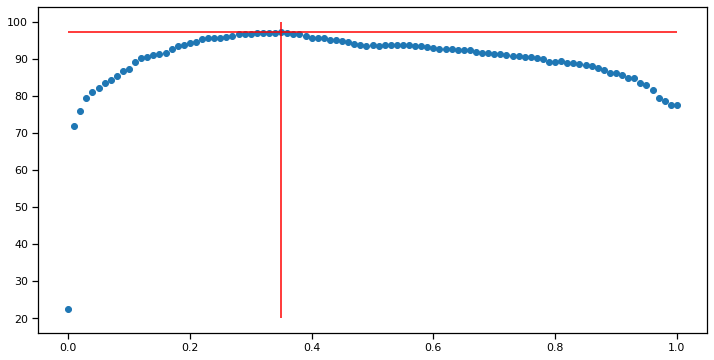

In [100]:
thresholdz = []
p = []
results = df3[["Null_Debt","Null_debt_proba"]]
#we compute the accuracy for every thresholds in [0,1]
for threshold in np.linspace(0,1,101):
    good=0
    for i in range(0,400):
        a= results.iloc[i]
        if a[0]==1:
            if a[1]>(threshold):
                good+=1
        elif a[0]==0:
            if a[1]<=(threshold):
                good+=1
    thresholdz.append(threshold)
    p.append(100*good/400)

threshbest = pd.DataFrame([thresholdz,p])

#plot of the geometrical finding of the treshold
fig, axs = plt.subplots()
fig.set_size_inches(12, 6)
axs.scatter(x = thresholdz, y =p)
axs.vlines(0.35, ymin = 20, ymax = 100, color = 'r')
axs.hlines(97.25, xmin = 0, xmax = 1, color = 'r')

#best treshold value
threshbest.loc[:, 34:37]

> The regression plot of our model

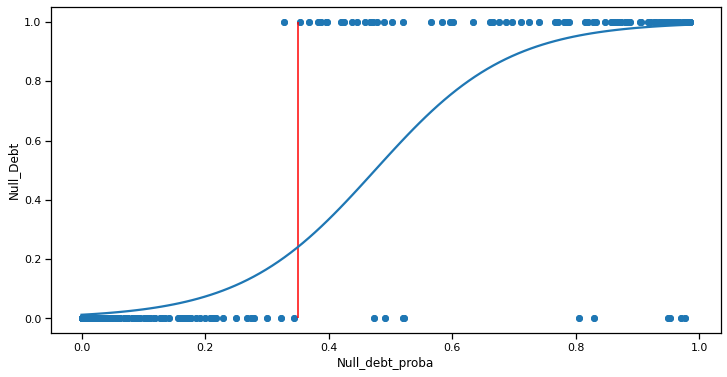

In [101]:
fig, axs = plt.subplots()
fig.set_size_inches(12, 6)

axs.scatter(y = df3["Null_Debt"], x = df3["Null_debt_proba"])
axs = sns.regplot(y = df3["Null_Debt"], x = df3["Null_debt_proba"], logistic=True, ci = None)
axs.vlines(0.35, ymin = 0, ymax = 1, color = 'r')

#### Confusion matrix
>* This model detects about 75% of null debt individuals
>* 25% of individuals detected as non null average debt have in fact null average debt
>* Less than 1% non null are detected as null
>* less than 1%  null are detected as non null

> This models detects the individuals with null average debt very well but it does not detect well non-null average debt individuals

[[75.    2.5 ]
 [ 0.25 22.25]]


<AxesSubplot:>

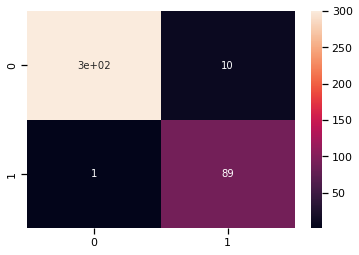

In [107]:
df3["Null_debt_proba"] = 1-predictions
Null_debt_pred = []
for elem in df3["Null_debt_proba"]:
    if elem<0.35:
        Null_debt_pred.append(0)
    else:
        Null_debt_pred.append(1)
df3["Null_debt_pred"] = Null_debt_pred

#Generate predictions with the model using our X values
predictions
#Get the confusion matrix
cf_matrix = confusion_matrix(df3["Null_Debt"], df3["Null_debt_pred"])
print(cf_matrix/4)
sns.heatmap(cf_matrix, annot = True)

### Conclusion
>* As the dataset does not allow us to make a better linear regression model, we can try other techniques such as logistic regression to try to find new patterns among the data.